In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### CK

In [2]:
# cis结果
ck_cis = pd.read_csv('./01.cis/new57w_ck_cis_result.txt', sep='\t', header=0)
ck_cis['pve'] = (2*ck_cis['lead_snp_beta']*ck_cis['lead_snp_beta']*ck_cis['maf']*(1-ck_cis['maf']))/(2*ck_cis['lead_snp_beta']*ck_cis['lead_snp_beta']*ck_cis['maf']*(1-ck_cis['maf'])+2*ck_cis['n_obs']*ck_cis['lead_snp_se']*ck_cis['lead_snp_se']*ck_cis['maf']*(1-ck_cis['maf']))
ck_cis.head()

,gene,lead_snp,snp_num,min_p,snp_ls,lead_snp_beta,lead_snp_se,maf,n_obs,pve
0,LOC_Os02g01130,rs2_94212,166,3.735515e-52,rs2_3208|rs2_3224|rs2_3516|rs2_4593|rs2_6290|r...,0.287575,0.017585,0.498,819,0.246168
1,LOC_Os02g01150,rs2_72288,108,7.382260e-42,rs2_3208|rs2_6290|rs2_6458|rs2_8515|rs2_8972|r...,-0.057122,0.003976,0.493,814,0.202292
2,LOC_Os02g01220,rs2_126562,44,1.387032e-13,rs2_34075|rs2_49745|rs2_56605|rs2_59181|rs2_75...,0.224606,0.029841,0.429,807,0.065597
3,LOC_Os02g01240,rs2_138317,78,8.446905e-23,rs2_37154|rs2_39218|rs2_42616|rs2_42780|rs2_46...,0.092417,0.009120,0.424,814,0.112013
4,LOC_Os02g01332,rs2_180547,6,5.709891e-09,rs2_135194|rs2_172781|rs2_174799|rs2_180547|rs...,0.074473,0.012647,0.440,822,0.040476


In [20]:
# ck_need
ck_need = ck_cis[['gene', 'pve','min_p']]
ck_need['type'] = 'cis'
ck_need.head()

C:\Users\gzy\AppData\Local\Temp\ipykernel_2556\3176818275.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ck_need['type'] = 'cis'


,gene,pve,min_p,type
0,LOC_Os02g01130,0.246168,3.735515e-52,cis
1,LOC_Os02g01150,0.202292,7.382260e-42,cis
2,LOC_Os02g01220,0.065597,1.387032e-13,cis
3,LOC_Os02g01240,0.112013,8.446905e-23,cis
4,LOC_Os02g01332,0.040476,5.709891e-09,cis


In [4]:
# trans结果
ck_ta = pd.read_csv('./02.trans/0.01/ck_trans_result0.01.txt', sep='\t', header=0)
ck_ta['n_pve'] = (2*ck_ta['beta']*ck_ta['beta']*ck_ta['af']*(1-ck_ta['af']))/(2*ck_ta['beta']*ck_ta['beta']*ck_ta['af']*(1-ck_ta['af'])+2*ck_ta['n_obs']*ck_ta['se']*ck_ta['se']*ck_ta['af']*(1-ck_ta['af']))
ck_ta.head()

,gene,bin,lead_snp,snp_num,p_value,se,beta,af,n_obs,pve,n_pve
0,LOC_Os01g01040,new_bin10820,rs9_8101612,7,6.291300e-14,0.042262,-0.322744,0.013,825,0.034138,0.066022
1,LOC_Os01g01050,new_bin9404,rs7_26738804,3,1.237808e-10,0.030542,-0.199129,0.020,825,0.025116,0.049001
2,LOC_Os01g01050,new_bin9405,rs7_26763340,18,1.030079e-11,0.032215,-0.222374,0.017,809,0.028607,0.055623
3,LOC_Os01g01050,new_bin10820,rs9_8152602,3,1.715965e-11,0.038596,-0.263448,0.011,824,0.027494,0.053516
4,LOC_Os01g01060,new_bin1561,rs1_40736715,3,1.239686e-09,0.021924,-0.134765,0.017,824,0.022414,0.043844


In [21]:
ck_ta_need = ck_ta[['gene', 'n_pve','p_value']]
ck_ta_need['type'] = 'trans'
ck_ta_need.columns = ['gene', 'pve', 'min_p', 'type']
ck_ta_need.head()

C:\Users\gzy\AppData\Local\Temp\ipykernel_2556\754846333.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ck_ta_need['type'] = 'trans'


,gene,pve,min_p,type
0,LOC_Os01g01040,0.066022,6.291300e-14,trans
1,LOC_Os01g01050,0.049001,1.237808e-10,trans
2,LOC_Os01g01050,0.055623,1.030079e-11,trans
3,LOC_Os01g01050,0.053516,1.715965e-11,trans
4,LOC_Os01g01060,0.043844,1.239686e-09,trans


In [22]:
# 将cis_need和trans_need合并
ck_all = pd.concat([ck_need, ck_ta_need])
ck_all.head()

,gene,pve,min_p,type
0,LOC_Os02g01130,0.246168,3.735515e-52,cis
1,LOC_Os02g01150,0.202292,7.382260e-42,cis
2,LOC_Os02g01220,0.065597,1.387032e-13,cis
3,LOC_Os02g01240,0.112013,8.446905e-23,cis
4,LOC_Os02g01332,0.040476,5.709891e-09,cis


In [23]:
# 添加一列-log10(P)
ck_all['-log10(P)'] = -np.log10(ck_all['min_p'])
ck_all.head()

,gene,pve,min_p,type,-log10(P)
0,LOC_Os02g01130,0.246168,3.735515e-52,cis,51.427650
1,LOC_Os02g01150,0.202292,7.382260e-42,cis,41.131811
2,LOC_Os02g01220,0.065597,1.387032e-13,cis,12.857914
3,LOC_Os02g01240,0.112013,8.446905e-23,cis,22.073302
4,LOC_Os02g01332,0.040476,5.709891e-09,cis,8.243372


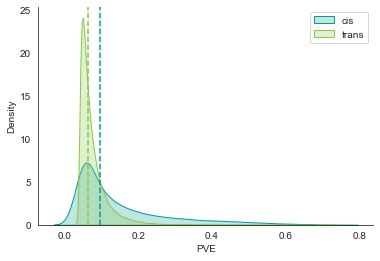

In [53]:
# 绘制pve密度分布图，type=cis和trans分开
sns.set_style('white')
sns.kdeplot(ck_all[ck_all['type']=='cis']['pve'], shade=True, color='#019d96', label='cis')
sns.kdeplot(ck_all[ck_all['type']=='trans']['pve'], shade=True, color='#87c847', label='trans')
# 添加x=ck_all[ck_all['type']=='cis']['pve'].median()
plt.axvline(x=ck_all[ck_all['type']=='cis']['pve'].median(), color='#019d96', linestyle='--')
plt.axvline(x=ck_all[ck_all['type']=='trans']['pve'].median(), color='#87c847', linestyle='--')
plt.legend()
plt.xlabel('PVE')
plt.ylabel('Density')
sns.despine(left=False, bottom=False)
plt.savefig('./ck_pve.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [14]:
from scipy.stats import ranksums
from scipy.stats import mannwhitneyu

In [13]:
grouped = ck_all.groupby('type')
group1 = grouped.get_group('cis')['pve']
group2 = grouped.get_group('trans')['pve']
ranksums(group1, group2)

RanksumsResult(statistic=47.88098580148739, pvalue=0.0)

In [25]:
grouped = ck_all.groupby('type')
group1 = grouped.get_group('cis')['-log10(P)']
group2 = grouped.get_group('trans')['-log10(P)']
mannwhitneyu(group1, group2)

MannwhitneyuResult(statistic=2852628707.5, pvalue=0.0)

In [ ]:
# 对cis的pve和trans的pve进行秩合检验
_,p = ranksums

In [16]:
_,p = mannwhitneyu(group1, group2, alternative='two-sided')
p

0.0

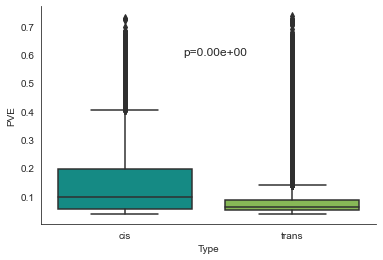

In [56]:
# 绘制pve的箱线图，将p值添加到图中,指定cis的颜色为#019d96，trans的颜色为#87c847
sns.set_style('white')
color_dict = {'cis': '#019d96', 'trans': '#87c847'}
sns.boxplot(x='type', y='pve', data=ck_all, palette=color_dict)
plt.text(x=0.35, y=0.6, s='p=%.2e'%p, fontsize=12)
plt.xlabel('Type')
plt.ylabel('PVE')
sns.despine(left=False, bottom=False)
plt.savefig('./ck_pve_boxplot.pdf', dpi=300, bbox_inches='tight')
plt.show()

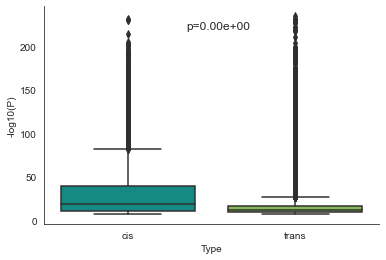

In [57]:
# 绘制pve的箱线图，将p值添加到图中
sns.set_style('white')
color_dict = {'cis': '#019d96', 'trans': '#87c847'}
sns.boxplot(x='type', y='-log10(P)', data=ck_all, palette=color_dict)
plt.text(x=0.35, y=220, s='p=%.2e'%p, fontsize=12)
plt.xlabel('Type')
plt.ylabel('-log10(P)')
sns.despine(left=False, bottom=False)
plt.savefig('./ck_p_boxplot.pdf', dpi=300, bbox_inches='tight')
plt.show()

### Salt

In [38]:
# cis结果
sa_cis = pd.read_csv('./01.cis/new57w_sa_cis_result.txt', sep='\t', header=0)
sa_cis['pve'] = (2*sa_cis['lead_snp_beta']*sa_cis['lead_snp_beta']*sa_cis['maf']*(1-sa_cis['maf']))/(2*sa_cis['lead_snp_beta']*sa_cis['lead_snp_beta']*sa_cis['maf']*(1-sa_cis['maf'])+2*sa_cis['n_obs']*sa_cis['lead_snp_se']*sa_cis['lead_snp_se']*sa_cis['maf']*(1-sa_cis['maf']))
sa_cis.head()

,gene,lead_snp,snp_num,min_p,snp_ls,lead_snp_beta,lead_snp_se,maf,n_obs,pve
0,LOC_Os01g01070,rs1_76413,25,2.080684e-12,rs1_1248|rs1_11172|rs1_19595|rs1_22530|rs1_261...,0.232854,0.032613,0.023,825,0.058196
1,LOC_Os01g01280,rs1_62529,50,1.766429e-10,rs1_34798|rs1_37441|rs1_39098|rs1_41749|rs1_41...,0.062997,0.009746,0.176,825,0.048198
2,LOC_Os01g01290,rs1_184256,218,6.141820e-58,rs1_41749|rs1_41825|rs1_42561|rs1_42659|rs1_42...,0.373265,0.021431,0.173,823,0.269324
3,LOC_Os01g01312,rs1_64577,95,2.785571e-16,rs1_52288|rs1_52647|rs1_53757|rs1_53979|rs1_57...,0.142408,0.017040,0.174,823,0.078225
4,LOC_Os01g01340,rs1_184256,51,2.331792e-10,rs1_69153|rs1_69856|rs1_72882|rs1_74044|rs1_78...,-0.042696,0.006651,0.173,823,0.047681


In [39]:
# sa_need
sa_need = sa_cis[['gene', 'pve','min_p']]
sa_need['type'] = 'cis'
sa_need.head()

C:\Users\gzy\AppData\Local\Temp\ipykernel_2556\4293795619.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sa_need['type'] = 'cis'


,gene,pve,min_p,type
0,LOC_Os01g01070,0.058196,2.080684e-12,cis
1,LOC_Os01g01280,0.048198,1.766429e-10,cis
2,LOC_Os01g01290,0.269324,6.141820e-58,cis
3,LOC_Os01g01312,0.078225,2.785571e-16,cis
4,LOC_Os01g01340,0.047681,2.331792e-10,cis


In [41]:
# trans结果
sa_ta = pd.read_csv('./02.trans/0.01/sa_trans_result0.01.txt',header=0,sep='\t')
sa_ta['n_pve'] = (2*sa_ta['beta']*sa_ta['beta']*sa_ta['af']*(1-sa_ta['af']))/(2*sa_ta['beta']*sa_ta['beta']*sa_ta['af']*(1-sa_ta['af'])+2*sa_ta['n_obs']*sa_ta['se']*sa_ta['se']*sa_ta['af']*(1-sa_ta['af']))
sa_ta.head()

,gene,bin,lead_snp,snp_num,p_value,se,beta,af,n_obs,pve,n_pve
0,LOC_Os01g01050,new_bin153,rs1_4403767,5,2.124656e-09,0.011279,-0.068318,0.353,812,0.022091,0.043226
1,LOC_Os01g01050,new_bin13142,rs12_7172404,7,1.175093e-10,0.025312,-0.165239,0.023,826,0.025148,0.049062
2,LOC_Os01g01050,new_bin13143,rs12_7189850,7,5.409792e-10,0.023863,-0.149941,0.026,822,0.023452,0.045829
3,LOC_Os01g01050,new_bin13145,rs12_7268713,3,1.035744e-09,0.025711,-0.158807,0.022,817,0.022816,0.044614
4,LOC_Os01g01050,new_bin13147,rs12_7422575,5,1.345607e-11,0.026134,-0.179343,0.021,823,0.027816,0.054126


In [42]:
# sa_ta_need
sa_ta_need = sa_ta[['gene', 'n_pve','p_value']]
sa_ta_need['type'] = 'trans'
sa_ta_need.columns = ['gene', 'pve', 'min_p', 'type']
sa_ta_need.head()

C:\Users\gzy\AppData\Local\Temp\ipykernel_2556\3193072862.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sa_ta_need['type'] = 'trans'


,gene,pve,min_p,type
0,LOC_Os01g01050,0.043226,2.124656e-09,trans
1,LOC_Os01g01050,0.049062,1.175093e-10,trans
2,LOC_Os01g01050,0.045829,5.409792e-10,trans
3,LOC_Os01g01050,0.044614,1.035744e-09,trans
4,LOC_Os01g01050,0.054126,1.345607e-11,trans


In [43]:
# 将cis_need和trans_need合并
sa_all = pd.concat([sa_need, sa_ta_need])
sa_all.head()

,gene,pve,min_p,type
0,LOC_Os01g01070,0.058196,2.080684e-12,cis
1,LOC_Os01g01280,0.048198,1.766429e-10,cis
2,LOC_Os01g01290,0.269324,6.141820e-58,cis
3,LOC_Os01g01312,0.078225,2.785571e-16,cis
4,LOC_Os01g01340,0.047681,2.331792e-10,cis


In [44]:
# 添加一列-log10(P)
sa_all['-log10(P)'] = -np.log10(sa_all['min_p'])
sa_all.head()

,gene,pve,min_p,type,-log10(P)
0,LOC_Os01g01070,0.058196,2.080684e-12,cis,11.681794
1,LOC_Os01g01280,0.048198,1.766429e-10,cis,9.752904
2,LOC_Os01g01290,0.269324,6.141820e-58,cis,57.211703
3,LOC_Os01g01312,0.078225,2.785571e-16,cis,15.555086
4,LOC_Os01g01340,0.047681,2.331792e-10,cis,9.632310


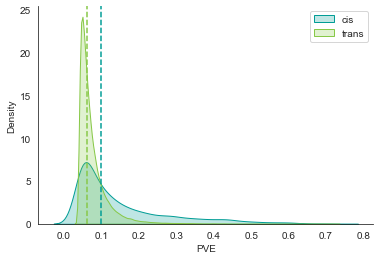

In [58]:
# 绘制pve密度分布图，type=cis和trans分开
sns.set_style('white')
sns.kdeplot(sa_all[sa_all['type']=='cis']['pve'], shade=True, color='#019d96', label='cis')
sns.kdeplot(sa_all[sa_all['type']=='trans']['pve'], shade=True, color='#87c847', label='trans')
# 添加x=sa_all[sa_all['type']=='cis']['pve'].median()
plt.axvline(x=sa_all[sa_all['type']=='cis']['pve'].median(), color='#019d96', linestyle='--')
plt.axvline(x=sa_all[sa_all['type']=='trans']['pve'].median(), color='#87c847', linestyle='--')
plt.legend()
plt.xlabel('PVE')
plt.ylabel('Density')
sns.despine(left=False, bottom=False)
plt.savefig('./sa_pve.pdf', dpi=300, bbox_inches='tight')
plt.show()

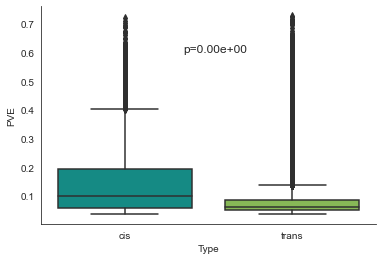

In [59]:
# 绘制pve的箱线图，将p值添加到图中,指定cis的颜色为#019d96，trans的颜色为#87c847
sns.set_style('white')
color_dict = {'cis': '#019d96', 'trans': '#87c847'}
sns.boxplot(x='type', y='pve', data=sa_all, palette=color_dict)
plt.text(x=0.35, y=0.6, s='p=%.2e'%p, fontsize=12)
plt.xlabel('Type')
plt.ylabel('PVE')
sns.despine(left=False, bottom=False)
plt.savefig('./sa_pve_boxplot.pdf', dpi=300, bbox_inches='tight')
plt.show()

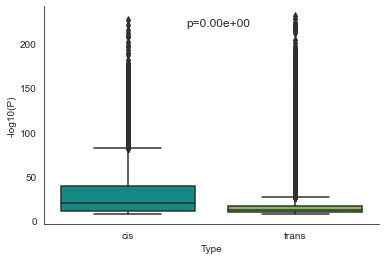

In [60]:
sns.set_style('white')
color_dict = {'cis': '#019d96', 'trans': '#87c847'}
sns.boxplot(x='type', y='-log10(P)', data=sa_all, palette=color_dict)
plt.text(x=0.35, y=220, s='p=%.2e'%p, fontsize=12)
plt.xlabel('Type')
plt.ylabel('-log10(P)')
sns.despine(left=False, bottom=False)
plt.savefig('./sa_p_boxplot.pdf', dpi=300, bbox_inches='tight')
plt.show()